<a href="https://colab.research.google.com/github/parwinderau/PhDAppliedAIMecManEng/blob/main/Cyberattack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd

# Load Voltage and Current Data for Microgrid 1
voltage_data_1 = pd.read_csv('Voltage1.csv')
current_data_1 = pd.read_csv('Current1.csv')

# Load Voltage and Current Data for Microgrid 2
voltage_data_2 = pd.read_csv('Voltage2.csv')
current_data_2 = pd.read_csv('Current2.csv')
# Data cleaning steps (if required)
# For example, remove rows with missing values



In [16]:
# Data cleaning steps (if required)
# For example, remove rows with missing values
voltage_data_1.dropna(inplace=True)
current_data_1.dropna(inplace=True)

voltage_data_2.dropna(inplace=True)
current_data_2.dropna(inplace=True)


In [17]:
# You may want to extract statistical features like mean, standard deviation, etc.
voltage_features_1 = voltage_data_1.describe()
current_features_1 = current_data_1.describe()

voltage_features_2 = voltage_data_2.describe()
current_features_2 = current_data_2.describe()


In [18]:
# Assuming the data is synchronized in time, you can merge the features
microgrid_data_1 = pd.concat([voltage_features_1, current_features_1], axis=1)
microgrid_data_2 = pd.concat([voltage_features_2, current_features_2], axis=1)



In [20]:
from sklearn.impute import SimpleImputer

# Define a simple imputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Impute missing values for Microgrid 1
microgrid_data_1_imputed = pd.DataFrame(imputer.fit_transform(microgrid_data_1))
microgrid_data_1_imputed.columns = microgrid_data_1.columns

# Train the Isolation Forest model for Microgrid 1
model_1 = IsolationForest(contamination=0.05, random_state=42)
microgrid_data_1_imputed['anomaly'] = model_1.fit_predict(microgrid_data_1_imputed)

# Impute missing values for Microgrid 2
microgrid_data_2_imputed = pd.DataFrame(imputer.fit_transform(microgrid_data_2))
microgrid_data_2_imputed.columns = microgrid_data_2.columns

# Train the Isolation Forest model for Microgrid 2
model_2 = IsolationForest(contamination=0.05, random_state=42)
microgrid_data_2_imputed['anomaly'] = model_2.fit_predict(microgrid_data_2_imputed)




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [21]:
threshold = 1  # Adjust this threshold based on visual inspection

suspected_attacks_1 = microgrid_data_1_imputed[microgrid_data_1_imputed['anomaly'] < threshold]
suspected_attacks_2 = microgrid_data_2_imputed[microgrid_data_2_imputed['anomaly'] < threshold]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


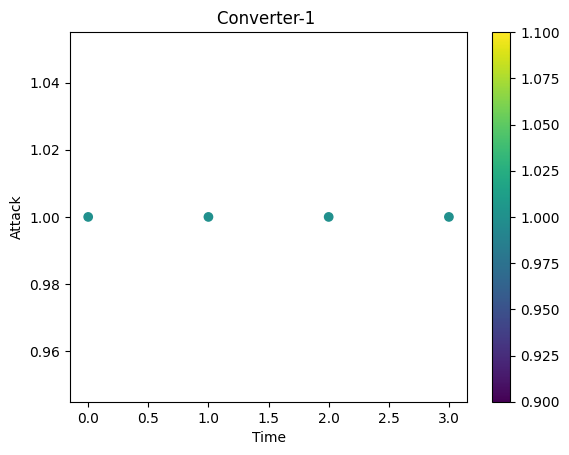

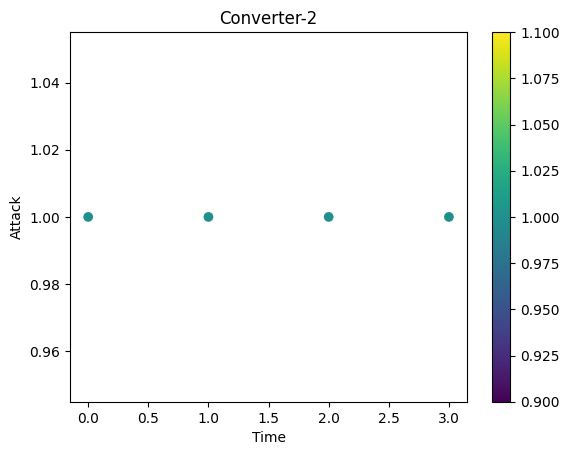

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [26]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Load Voltage and Current Data for Microgrid 1
voltage_data_1 = pd.read_csv('Voltage1.csv')
current_data_1 = pd.read_csv('Current1.csv')

# Load Voltage and Current Data for Microgrid 2
voltage_data_2 = pd.read_csv('Voltage2.csv')
current_data_2 = pd.read_csv('Current2.csv')

# Data cleaning steps (if required)
voltage_data_1.dropna(inplace=True)
current_data_1.dropna(inplace=True)

voltage_data_2.dropna(inplace=True)
current_data_2.dropna(inplace=True)

# You may want to extract statistical features like mean, standard deviation, etc.
voltage_features_1 = voltage_data_1.describe()
current_features_1 = current_data_1.describe()

voltage_features_2 = voltage_data_2.describe()
current_features_2 = current_data_2.describe()

# Assuming the data is synchronized in time, you can merge the features
microgrid_data_1 = pd.concat([voltage_features_1, current_features_1], axis=1)
microgrid_data_2 = pd.concat([voltage_features_2, current_features_2], axis=1)

# Define a simple imputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Impute missing values for Microgrid 1
microgrid_data_1_imputed = pd.DataFrame(imputer.fit_transform(microgrid_data_1))
microgrid_data_1_imputed.columns = microgrid_data_1.columns

# Train the Isolation Forest model for Microgrid 1
model_1 = IsolationForest(contamination=0.05, random_state=42)
microgrid_data_1_imputed['anomaly'] = model_1.fit_predict(microgrid_data_1_imputed)

# Impute missing values for Microgrid 2
microgrid_data_2_imputed = pd.DataFrame(imputer.fit_transform(microgrid_data_2))
microgrid_data_2_imputed.columns = microgrid_data_2.columns

# Train the Isolation Forest model for Microgrid 2
model_2 = IsolationForest(contamination=0.05, random_state=42)
microgrid_data_2_imputed['anomaly'] = model_2.fit_predict(microgrid_data_2_imputed)

# Visualize Results for Microgrid 1
plt.scatter(microgrid_data_1_imputed.index, microgrid_data_1_imputed['anomaly'], c=microgrid_data_1_imputed['anomaly'], cmap='viridis')
plt.title('Converter-1 ')
plt.xlabel('Time')
plt.ylabel('Attack')
plt.colorbar()
plt.show()

# Visualize Results for Microgrid 2
plt.scatter(microgrid_data_2_imputed.index, microgrid_data_2_imputed['anomaly'], c=microgrid_data_2_imputed['anomaly'], cmap='viridis')
plt.title('Converter-2')
plt.xlabel('Time')
plt.ylabel('Attack')
plt.colorbar()
plt.show()

# Define threshold for potential cyber-attacks
threshold = 1

# Identify potential cyber-attacks for Microgrid 1
suspected_attacks_1 = microgrid_data_1_imputed[microgrid_data_1_imputed['anomaly'] < threshold]

# Identify potential cyber-attacks for Microgrid 2
suspected_attacks_2 = microgrid_data_2_imputed[microgrid_data_2_imputed['anomaly'] < threshold]

# Print or further analyze suspected attacks
print("Suspected Attacks in Microgrid 1:")
print(suspected_attacks_1)

print("\nSuspected Attacks in Microgrid 2:")
print(suspected_attacks_2)
